In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import  *
#Zonder schema wordt de namen van de column onduidelijk zoals col1,col2 ....
crimes_schema = StructType([StructField("ID", StringType(), True),
                            StructField("CaseNumber", StringType(), True),
                            StructField("Date", StringType(), True ),
                            StructField("Block", StringType(), True),
                            StructField("IUCR", StringType(), True),
                            StructField("PrimaryType", StringType(), True  ),
                            StructField("Description", StringType(), True ),
                            StructField("LocationDescription", StringType(), True ),
                            StructField("Arrest", BooleanType(), True),
                            StructField("Domestic", BooleanType(), True),
                            StructField("Beat", StringType(), True),
                            StructField("District", StringType(), True),
                            StructField("Ward", StringType(), True),
                            StructField("CommunityArea", StringType(), True),
                            StructField("FBICode", StringType(), True ),
                            StructField("XCoordinate", DoubleType(), True),
                            StructField("YCoordinate", DoubleType(), True ),
                            StructField("Year", IntegerType(), True),
                            StructField("UpdatedOn", DateType(), True ),
                            StructField("Latitude", DoubleType(), True),
                            StructField("Longitude", DoubleType(), True),
                            StructField("Location", StringType(), True )
                            ])



spark = SparkSession.builder\
                    .appName('Analyzing Bosten and chicago Crime data')\
                    .getOrCreate()

crimes = spark.read.csv(".\city_of_chicago_crimes_2001_to_present.csv",
                       header = True, 
                        schema = crimes_schema)

In [2]:
crimes.count()

6747040

In [3]:
crimes.columns

['ID',
 'CaseNumber',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'LocationDescription',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'CommunityArea',
 'FBICode',
 'XCoordinate',
 'YCoordinate',
 'Year',
 'UpdatedOn',
 'Latitude',
 'Longitude',
 'Location']

In [4]:
crimes.select('Date').show(10,truncate=False)

+----------------------+
|Date                  |
+----------------------+
|03/18/2015 07:44:00 PM|
|03/18/2015 11:00:00 PM|
|03/18/2015 10:45:00 PM|
|03/18/2015 10:30:00 PM|
|03/18/2015 09:00:00 PM|
|03/18/2015 10:00:00 PM|
|03/18/2015 11:00:00 PM|
|03/18/2015 09:35:00 PM|
|03/18/2015 10:09:00 PM|
|03/18/2015 09:25:00 PM|
+----------------------+
only showing top 10 rows



In [5]:
from datetime import datetime
from pyspark.sql.functions import col,udf
myfunc =  udf(lambda x: datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'), TimestampType())
df =crimes.withColumn('Date_time',myfunc(col('Date'))).drop('Date')
df.select(df["Date_time"]).show(5)

+-------------------+
|          Date_time|
+-------------------+
|2015-03-18 19:44:00|
|2015-03-18 23:00:00|
|2015-03-18 22:45:00|
|2015-03-18 22:30:00|
|2015-03-18 21:00:00|
+-------------------+
only showing top 5 rows



In [6]:
#data = df.groupBy('Year').count().show()
data =df.groupBy('Year').count().sort('Year').collect()
count = [item[1] for item in data]
year = [item[0] for item in data]
data

[Row(Year=2001, count=485749),
 Row(Year=2002, count=486753),
 Row(Year=2003, count=475936),
 Row(Year=2004, count=469381),
 Row(Year=2005, count=453703),
 Row(Year=2006, count=448097),
 Row(Year=2007, count=436999),
 Row(Year=2008, count=427038),
 Row(Year=2009, count=392663),
 Row(Year=2010, count=370290),
 Row(Year=2011, count=351749),
 Row(Year=2012, count=335921),
 Row(Year=2013, count=307030),
 Row(Year=2014, count=275200),
 Row(Year=2015, count=263929),
 Row(Year=2016, count=268813),
 Row(Year=2017, count=267791),
 Row(Year=2018, count=229998)]

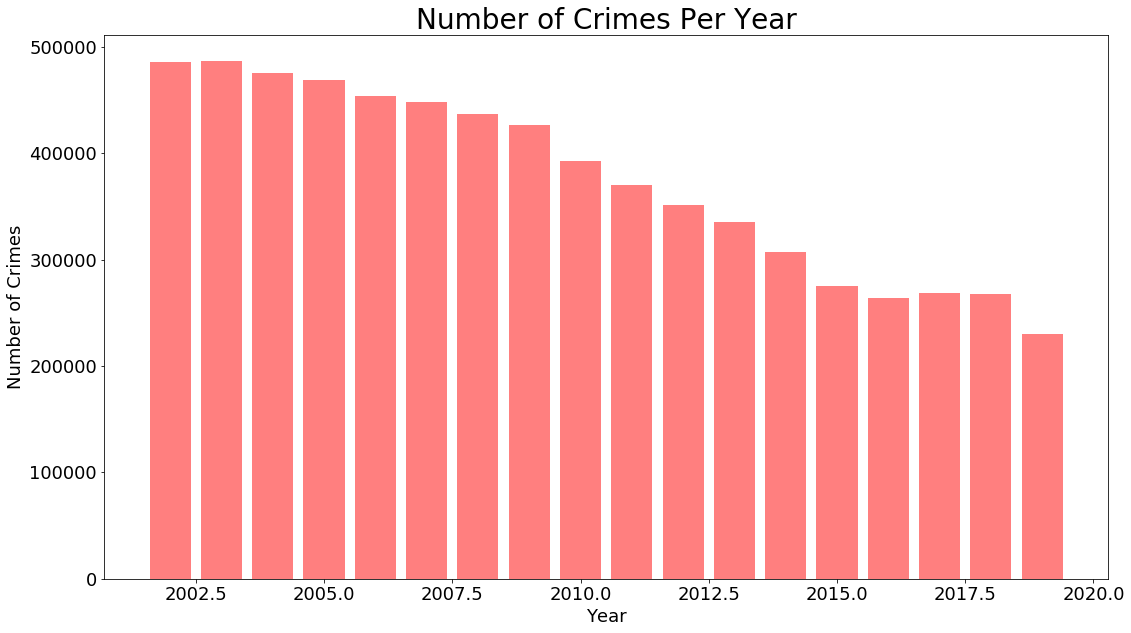

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

x_axis = [i+1 for i in year] 
y_axis= [i for i in count]





fig1 = plt.figure(figsize=(18, 10))
 


plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.title("Number of Crimes Per Year", fontsize = 28)
plt.bar(x_axis, y_axis, fc='red', align='center',alpha=0.5)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()


In [8]:
from pyspark.sql.functions import month
monthdf = df.withColumn("Month",month('Date_time'))
monthCounts = monthdf.select("Month").groupBy("Month").count()
monthCounts = monthCounts.collect()
monthCounts

[Row(Month=12, count=482791),
 Row(Month=1, count=528250),
 Row(Month=6, count=599974),
 Row(Month=3, count=557410),
 Row(Month=5, count=602989),
 Row(Month=9, count=585235),
 Row(Month=4, count=559005),
 Row(Month=8, count=624245),
 Row(Month=7, count=630368),
 Row(Month=10, count=592402),
 Row(Month=11, count=520537),
 Row(Month=2, count=463834)]

In [9]:
monthCounts.sort()
months = [item[0] for item in monthCounts]
count = [item[1] for item in monthCounts]
monthCounts

[Row(Month=1, count=528250),
 Row(Month=2, count=463834),
 Row(Month=3, count=557410),
 Row(Month=4, count=559005),
 Row(Month=5, count=602989),
 Row(Month=6, count=599974),
 Row(Month=7, count=630368),
 Row(Month=8, count=624245),
 Row(Month=9, count=585235),
 Row(Month=10, count=592402),
 Row(Month=11, count=520537),
 Row(Month=12, count=482791)]

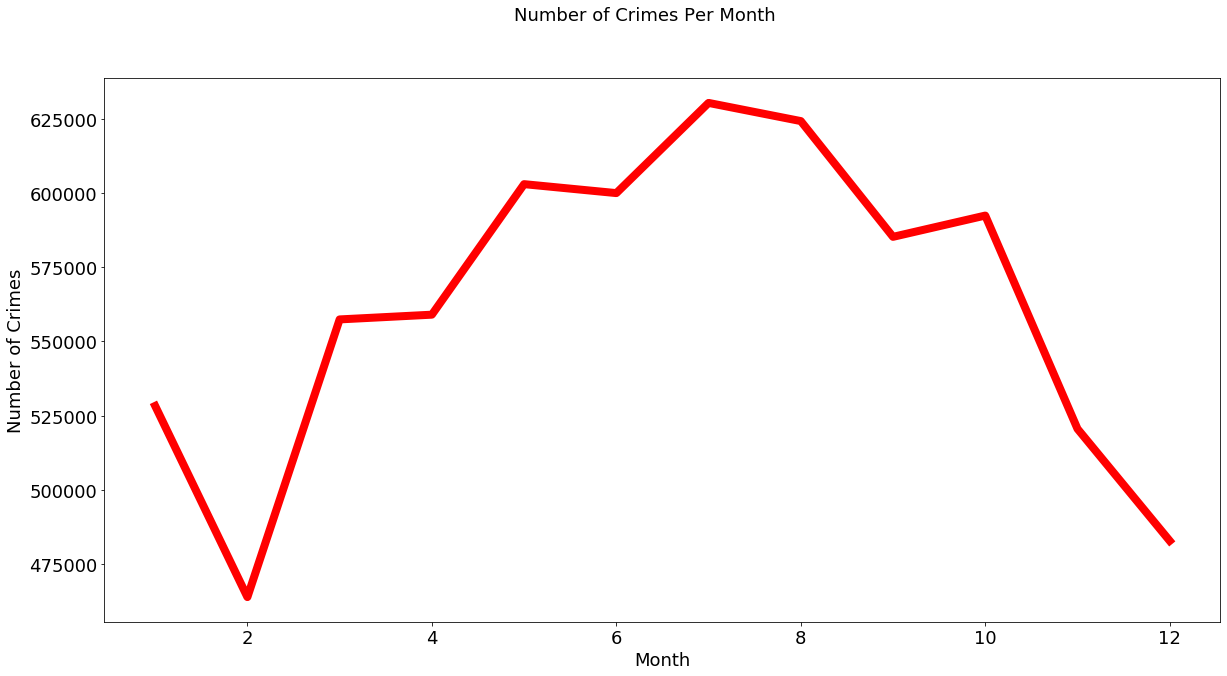

In [10]:
x_axis = [i for i in months] 
y_axis= [i for i in count]

fig = plt.figure(figsize=(20,10))
fig.suptitle('Number of Crimes Per Month', fontsize=18)
plt1 = fig.add_subplot(111)
 
plt.xlabel("Month", fontsize = 18)
plt.ylabel("Number of Crimes", fontsize = 18)
plt.plot(x_axis,y_axis,linewidth = 8,color = "red")
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [11]:
crime_location  = crimes.groupBy("LocationDescription").count().sort('count', ascending  = False).limit(20).collect()
crime_location

[Row(LocationDescription='STREET', count=1770601),
 Row(LocationDescription='RESIDENCE', count=1142451),
 Row(LocationDescription='APARTMENT', count=697292),
 Row(LocationDescription='SIDEWALK', count=665415),
 Row(LocationDescription='OTHER', count=256428),
 Row(LocationDescription='PARKING LOT/GARAGE(NON.RESID.)', count=193801),
 Row(LocationDescription='ALLEY', count=150881),
 Row(LocationDescription='SCHOOL, PUBLIC, BUILDING', count=142257),
 Row(LocationDescription='RESIDENCE-GARAGE', count=131632),
 Row(LocationDescription='SMALL RETAIL STORE', count=119254),
 Row(LocationDescription='RESIDENCE PORCH/HALLWAY', count=117912),
 Row(LocationDescription='VEHICLE NON-COMMERCIAL', count=108210),
 Row(LocationDescription='RESTAURANT', count=105579),
 Row(LocationDescription='GROCERY FOOD STORE', count=87297),
 Row(LocationDescription='DEPARTMENT STORE', count=83660),
 Row(LocationDescription='GAS STATION', count=71977),
 Row(LocationDescription='RESIDENTIAL YARD (FRONT/BACK)', count=694

In [12]:
location = [item[0] for item in crime_location]
count = [item[1] for item in crime_location]
location

['STREET',
 'RESIDENCE',
 'APARTMENT',
 'SIDEWALK',
 'OTHER',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'ALLEY',
 'SCHOOL, PUBLIC, BUILDING',
 'RESIDENCE-GARAGE',
 'SMALL RETAIL STORE',
 'RESIDENCE PORCH/HALLWAY',
 'VEHICLE NON-COMMERCIAL',
 'RESTAURANT',
 'GROCERY FOOD STORE',
 'DEPARTMENT STORE',
 'GAS STATION',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'CHA PARKING LOT/GROUNDS',
 'PARK PROPERTY',
 'COMMERCIAL / BUSINESS OFFICE']

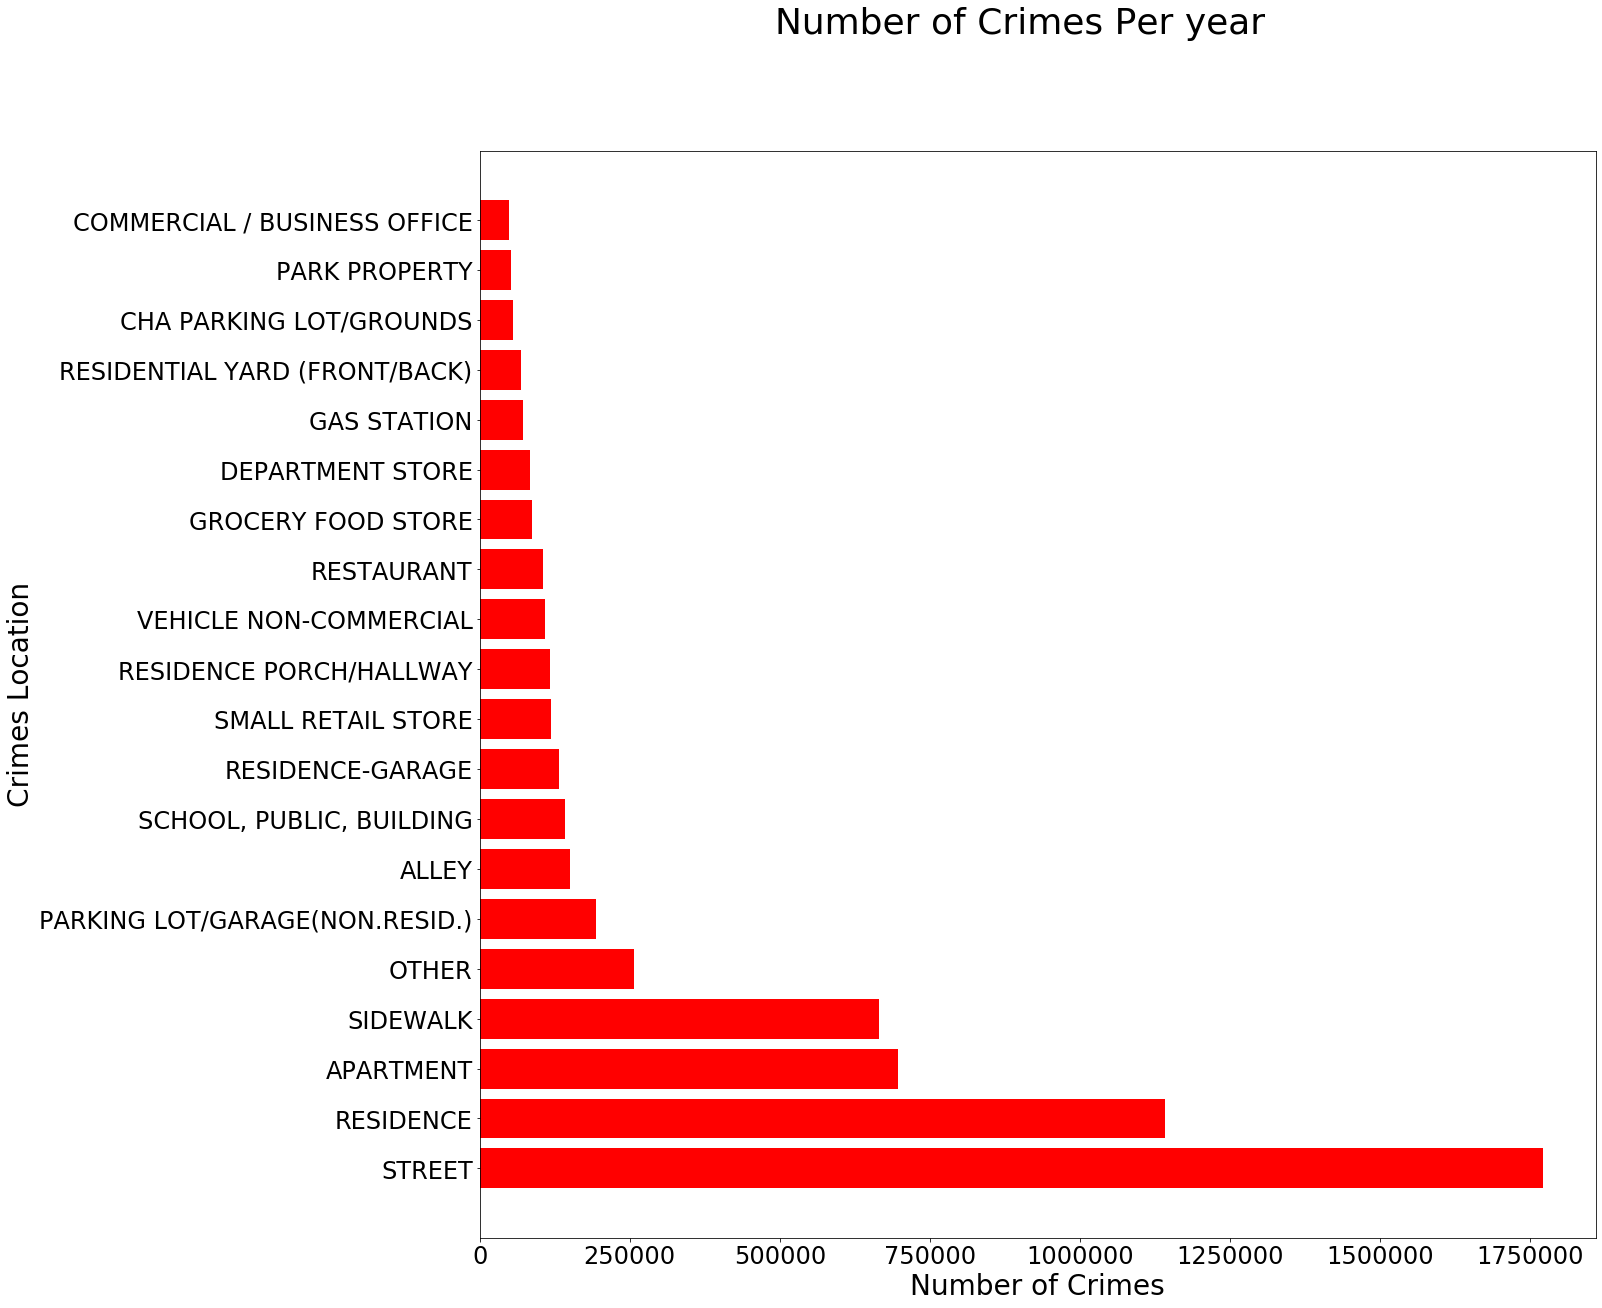

In [13]:
x_axis = [i for i in location] 
y_axis= [i for i in count]

fig = plt.figure(figsize=(20,20))
fig.suptitle('Number of Crimes Per year', fontsize=36)
 
plt.xlabel("Number of Crimes", fontsize = 28)
plt.ylabel("Crimes Location", fontsize = 28)
plt.barh(x_axis,y_axis,color = "red")
plt.xticks(size = 24)
plt.yticks(size = 24)
plt.show()

In [17]:
crime_Coordinates  = crimes.groupBy("Latitude","longitude").count().sort('count', ascending  = False).limit(50).collect()
crime_Coordinates.pop(0)
map_location = [[item[0],item[1],item[2]] for item in crime_Coordinates]
long_lat=[[item[0],item[1]] for item in map_location]       
long_lat.pop(0)
count=[item[2] for item in map_location]
map_location

[[41.976290414, -87.905227221, 13112],
 [41.754592961, -87.741528537, 9434],
 [41.883500187, -87.627876698, 6935],
 [41.897895128, -87.624096605, 4285],
 [41.896888586, -87.628203192, 3120],
 [41.909664252, -87.742728815, 3037],
 [41.885487535, -87.726422045, 2678],
 [41.904192368, -87.647000785, 2545],
 [41.788987036, -87.74147999, 2454],
 [41.88233367, -87.627841791, 2437],
 [41.721627204, -87.624485177, 2380],
 [41.736259984, -87.628068782, 2371],
 [41.737094305, -87.572998178, 2285],
 [41.68995741, -87.637460623, 2257],
 [41.739265865, -87.604893749, 2187],
 [41.891990384, -87.611461502, 2179],
 [41.979006297, -87.906463155, 2137],
 [41.868180939, -87.709271389, 2130],
 [41.736148121, -87.629070243, 2050],
 [41.706070186, -87.653645803, 2004],
 [41.814007401, -87.628331665, 1957],
 [42.019399237, -87.675049485, 1915],
 [41.868541914, -87.639235361, 1896],
 [41.750940757, -87.625185222, 1891],
 [41.899410159, -87.624131266, 1887],
 [41.766102387, -87.573539169, 1879],
 [41.976200173

In [33]:
import folium
first_map = folium.Map(location=[41.885487535, -87.726422045], zoom_start=13)
HeatMap(long_lat,name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=25, blur=10, gradient=None, overlay=True, control=True, show=True).add_to(first_map)

first_map